In [ ]:
import datetime
print(datetime.datetime.now())

2021-02-25 23:07:43.175430


In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
s = "  Hi, let's play with some code"

## Case Normalization

In [ ]:
s.lower()

"  hi, let's play with some code"

## Tokenization
For simple tokenzation, the NLTK docs recommend to just use .split()

In [ ]:
s.split()
#return list

['Hi,', "let's", 'play', 'with', 'some', 'code']

In [ ]:
#Can also use nltk's word_tokenize() function.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maryamasghari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
word_tokenize(s)

['Hi', ',', 'let', "'s", 'play', 'with', 'some', 'code']

In [ ]:
word_tokenize("mary@gmail.com")

['mary', '@', 'gmail.com']

In [ ]:
word_tokenize("U.N , NYC , Let's go !")

['U.N', ',', 'NYC', ',', 'Let', "'s", 'go', '!']

nltk even has a tokenizer for tweets!

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

## N-Grams

In [ ]:
#from nltk import word_tokenize                                                             
from nltk.util import ngrams
tokens = word_tokenize("Hey there, I am awesome.")

grams = ngrams(tokens,2)
for grams in grams:
  print(grams)

grams = ngrams(tokens,3)
for grams in grams:
  print(grams)

('Hey', 'there')
('there', ',')
(',', 'I')
('I', 'am')
('am', 'awesome')
('awesome', '.')
('Hey', 'there', ',')
('there', ',', 'I')
(',', 'I', 'am')
('I', 'am', 'awesome')
('am', 'awesome', '.')


## Removing Characters

In [ ]:
import re
s = "Hey! Let's go ..."
#r tells python that this sttring contains a regular expression
s = "Hi Tom, let's go .. "
re.sub(r'Tom', 'Sam', s)
re.sub(r'[^\w\s]', '', s)

"Hi Sam, let's go .. "

'Hi Tom lets go  '

In [ ]:
import unidecode
# the u tells python that this string contains unicode characters 
s = u'Ábcdêãçoàúü'

unidecode.unidecode(s)

'Abcdeacoauu'

In [ ]:
import re
#\d means any number 
#+ means one or more time
re.sub(r'\d+','', 'I have 3 birds ')

'I have  birds '

In [ ]:
sentences = [
  "Alejandrina has a small store in her house where she sells basic products. Translated from Spanish by Jennifer Day, Kiva Volunteer.",
  "Nancy works as a saleswoman, her main product being used clothing.Translated from Spanish by Kiva Volunteer, Kristin Connor.",
  "Marjorie sells lunch to companies and construction workers. Translated by Ramn F. Kolb."]

[re.sub(r'Translated[^\.]+\.', '', s) for s in sentences]

['Alejandrina has a small store in her house where she sells basic products. ',
 'Nancy works as a saleswoman, her main product being used clothing.',
 'Marjorie sells lunch to companies and construction workers.  Kolb.']

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maryamasghari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
WordNetLemmatizer().lemmatize('works')


'work'

In [ ]:
WordNetLemmatizer().lemmatize('shelves')

'shelf'

In [ ]:
from nltk.stem.porter import PorterStemmer
PorterStemmer().stem('shelves')

'shelv'

In [ ]:
PorterStemmer().stem('generously')

'gener'

In [ ]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer('english').stem('generously')

'generous'

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
LancasterStemmer().stem('worked')

'work'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maryamasghari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import pprint
pp = pprint.PrettyPrinter(width=80, compact=True)
pp.pprint(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an',
 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been',
 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn',
 "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't",
 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from',
 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
 "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself',
 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's",
 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more',
 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor',
 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our',
 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", '

In [ ]:
tokens = nltk.word_tokenize("My name is Mary, and I am a student.".lower())
#create a list of all words that are not stop words
[t for t in tokens if t not in stopwords.words('english')]

['name', 'mary', ',', 'student', '.']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

myText = ["This is a blue ball as a the quick text to vectorize in a simple way",
              "the blue ball matrix",
              "the quick matrix"]


tf_vectorizer = CountVectorizer(min_df=.5, max_df=.75, ngram_range=[1,3])
dtm_tf = tf_vectorizer.fit_transform(myText)
print(dtm_tf.shape)

import pandas as pd
df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df.head()

(3, 6)


,ball,blue,blue ball,matrix,quick,the quick
0,1,1,1,0,1,1
1,1,1,1,1,0,0
2,0,0,0,1,1,1


In [ ]:
import os
in_dir = "/Users/maryamasghari/Documents/GitHub/NLP_course/data"
#out_dir = "C:/Users/st50/Documents/sandbox/out"

kiva_df=pd.read_csv(os.path.join(in_dir, "kiva_50.csv"))
#kiva_df = kiva_df.sample(frac=0.1)

kiva_df.dropna(inplace=True)
list(kiva_df)
kiva_df.shape
kiva_df.head()
kiva_df.tail()

['status', 'sector', 'en', 'country', 'gender', 'loan_amount', 'nonpayment']

(3935, 7)

,status,sector,en,country,gender,loan_amount,nonpayment
0,paid,Agriculture,"<p style=""margin: 0in 0in 0pt"" class=""MsoNorma...",Kenya,F,600.0,partner
1,paid,Retail,Louise Njambi Ndungu is 39 years old. She is m...,Kenya,F,800.0,partner
2,paid,Retail,Oscar Owino is an average-aged man who is marr...,Kenya,M,1275.0,lender
3,defaulted,Food,"Dorcas Wairimu is 35 years old, married, and h...",Kenya,F,600.0,lender
4,paid,Clothing,Maria is a woman who started over 5 years ago ...,Dominican Republic,F,375.0,partner


,status,sector,en,country,gender,loan_amount,nonpayment
3989,paid,Food,"Mara Maribel, a humorous but hard-working woma...",Dominican Republic,F,950.0,partner
3990,defaulted,Agriculture,Sarah is 40 years old. She is married and has ...,Kenya,F,300.0,lender
3991,defaulted,Food,"Ann Wangare Kamau, aged 43 years, is married w...",Kenya,F,1200.0,lender
3992,paid,Food,<p>Martha is asking for a second loan after ha...,Ecuador,F,1175.0,partner
3993,paid,Food,"Alejandrina sells empanadas, pts, sandwiches a...",Dominican Republic,F,450.0,partner


In [ ]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time kiva_df['en_clean'] = kiva_df['en'].apply(preprocess)
kiva_df.head()

CPU times: user 2.21 s, sys: 14.7 ms, total: 2.23 s
Wall time: 2.23 s


,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
0,paid,Agriculture,"<p style=""margin: 0in 0in 0pt"" class=""MsoNorma...",Kenya,F,600.0,partner,jane year old widow child two local technical ...
1,paid,Retail,Louise Njambi Ndungu is 39 years old. She is m...,Kenya,F,800.0,partner,louise njambi ndungu year old married four chi...
2,paid,Retail,Oscar Owino is an average-aged man who is marr...,Kenya,M,1275.0,lender,oscar owino averageaged man married wife six c...
3,defaulted,Food,"Dorcas Wairimu is 35 years old, married, and h...",Kenya,F,600.0,lender,dorcas wairimu year old married child child sc...
4,paid,Clothing,Maria is a woman who started over 5 years ago ...,Dominican Republic,F,375.0,partner,maria woman started year ago selling clothes n...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, max_features=no_features, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(kiva_df['en_clean'])
print(dtm_tf.shape)

CPU times: user 1.59 s, sys: 74.7 ms, total: 1.66 s
Wall time: 1.67 s
(3935, 343)


In [ ]:
df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df.head()

,able,access,access business,access business training,active,active member,activity,add,additional,age,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,2,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Calculate column sums from DTM
sum_words = dtm_tf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tf_vectorizer.vocabulary_.items()]

# Now, sort them
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display top few
words_freq[:20]

[('buy', 2650),
 ('school', 2619),
 ('group', 2517),
 ('also', 2490),
 ('family', 2342),
 ('able', 2258),
 ('old', 1990),
 ('work', 1921),
 ('one', 1883),
 ('two', 1858),
 ('year old', 1855),
 ('small', 1844),
 ('product', 1803),
 ('help', 1736),
 ('husband', 1725),
 ('member', 1638),
 ('woman', 1610),
 ('married', 1583),
 ('income', 1575),
 ('life', 1570)]

<Figure size 360x576 with 0 Axes>

/Users/maryamasghari/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6dbb6d150>,
                    color=None,
                    features=['able', 'access', 'access business',
                              'access business training', 'active',
                              'active member', 'activity', 'add', 'additional',
                              'age', 'ago', 'allow', 'already', 'also',
                              'always', 'amount', 'another', 'applied', 'area',
                              'attend', 'back', 'bank', 'basic', 'bean',
                              'began', 'belief', 'better', 'born', 'bought',
                              'bulk', ...],
                    n=None, orient='h')

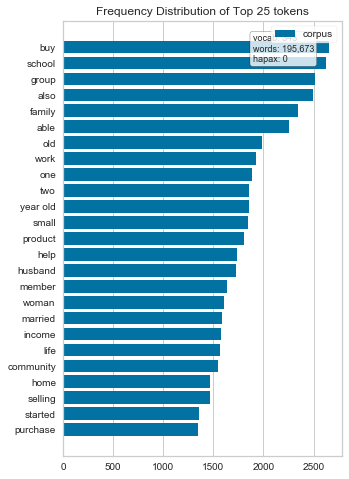

In [ ]:
from yellowbrick.text import FreqDistVisualizer

plt.figure(figsize=(5,8))
visualizer = FreqDistVisualizer(features=tf_vectorizer.get_feature_names(), n=25)
visualizer.fit(dtm_tf)
visualizer.poof()

In [ ]:
#/Users/maryamasghari/opt/anaconda3/bin/python -m pip install --upgrade pip

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/maryamasghari/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6dcbc23d0>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=123)

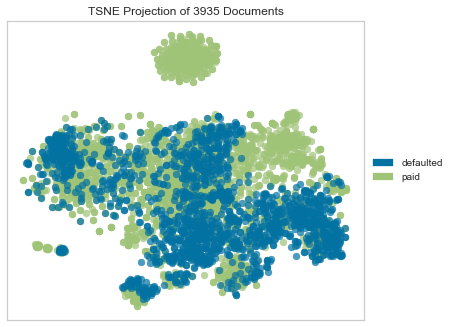

In [ ]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(random_state=123)
tsne.fit(dtm_tf, kiva_df['status'])
tsne.poof()


Vectorization
Using the cleaned Kiva data from above, we'll try a few different methods:
BOW (with raw TF, and TF-IDF)
Feature hashing
Topics
GloVe


In [ ]:
BOW - TF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df.shape

kiva_df_bow = pd.concat([kiva_df, bow_df], axis=1)
kiva_df_bow.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow.shape
kiva_df_bow.head()
kiva_df_bow.tail()

CPU times: user 1.69 s, sys: 64.8 ms, total: 1.75 s
Wall time: 1.75 s


(3935, 343)

(3935, 349)

,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,paid,Agriculture,Kenya,F,600.0,partner,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,paid,Retail,Kenya,F,800.0,partner,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,paid,Retail,Kenya,M,1275.0,lender,2,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,defaulted,Food,Kenya,F,600.0,lender,1,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,paid,Clothing,Dominican Republic,F,375.0,partner,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
3989,paid,Food,Dominican Republic,F,950.0,partner,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3990,defaulted,Agriculture,Kenya,F,300.0,lender,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3991,defaulted,Food,Kenya,F,1200.0,lender,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3992,paid,Food,Ecuador,F,1175.0,partner,2,1,1,1,...,0,1,0,1,0,0,0,0,0,0
3993,paid,Food,Dominican Republic,F,450.0,partner,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


BOW - TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tfidf = tfidf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df_tfidf.shape

kiva_df_bow_tfidf = pd.concat([kiva_df, bow_df_tfidf], axis=1)
kiva_df_bow_tfidf.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow_tfidf.shape
kiva_df_bow_tfidf.head()

CPU times: user 1.69 s, sys: 66.9 ms, total: 1.76 s
Wall time: 1.76 s


(3935, 343)

(3935, 349)

,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,paid,Agriculture,Kenya,F,600.0,partner,0.138710,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.132831,0.000000,0.0,0.000000
1,paid,Retail,Kenya,F,800.0,partner,0.072572,0.0,0.0,0.0,...,0.000000,0.100787,0.0,0.0,0.000000,0.0,0.069496,0.111673,0.0,0.000000
2,paid,Retail,Kenya,M,1275.0,lender,0.153667,0.0,0.0,0.0,...,0.121463,0.000000,0.0,0.0,0.113950,0.0,0.000000,0.000000,0.0,0.000000
3,defaulted,Food,Kenya,F,600.0,lender,0.067666,0.0,0.0,0.0,...,0.106970,0.000000,0.0,0.0,0.000000,0.0,0.064798,0.104124,0.0,0.112026
4,paid,Clothing,Dominican Republic,F,375.0,partner,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.174692,0.0,0.000000,0.000000,0.0,0.000000


Feature Hashing
Simple Example

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

docs = ["my dog loves your dog",
        "your dog loves the park",
        "my dog and your dog love fleas"]

h_vectorizer = HashingVectorizer(n_features=2**3, ngram_range=[1,1], norm=None, alternate_sign=False)
dtm_h = h_vectorizer.fit_transform(docs)
dtm_h.toarray()
bow_df_h = pd.DataFrame(dtm_h.toarray())
bow_df_h.shape
bow_df_h.head()

array([[0., 0., 1., 0., 1., 2., 0., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 2., 0., 1., 3., 0., 0.]])

(3, 8)

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

h_vectorizer = HashingVectorizer(n_features=2**9, ngram_range=[1,3])
%time dtm_h = h_vectorizer.fit_transform(kiva_df['en_clean'])
bow_df_h = pd.DataFrame(dtm_h.toarray(), index=kiva_df.index)
bow_df_h.shape

kiva_df_h = pd.concat([kiva_df, bow_df_h], axis=1)
kiva_df_h.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_h.shape
kiva_df_h.head()

CPU times: user 488 ms, sys: 4.94 ms, total: 493 ms
Wall time: 492 ms


(3935, 512)

(3935, 518)

,status,sector,country,gender,loan_amount,nonpayment,0,1,2,3,...,502,503,504,505,506,507,508,509,510,511
0,paid,Agriculture,Kenya,F,600.0,partner,0.0,0.000000,0.000000,0.000000,...,-0.101535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101535,0.0,0.000000
1,paid,Retail,Kenya,F,800.0,partner,0.0,0.000000,0.000000,0.000000,...,0.048679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048679,0.0,0.000000
2,paid,Retail,Kenya,M,1275.0,lender,0.0,0.000000,0.000000,0.054233,...,0.054233,-0.054233,0.000000,0.000000,-0.108465,0.000000,0.054233,0.054233,0.0,0.000000
3,defaulted,Food,Kenya,F,600.0,lender,0.0,-0.056523,-0.056523,0.000000,...,-0.056523,0.000000,0.056523,-0.056523,0.000000,0.056523,-0.056523,0.056523,0.0,0.000000
4,paid,Clothing,Dominican Republic,F,375.0,partner,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.078811,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.078811


Embeddings with Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = ["the dog is really smart",
        "the cat is really smart",
        "the rat is really smart",
        "the mouse is really smart",
        "the dog ran to the store",
        "the cat ran to the store",
        "the rat ran to the store",
        "the mouse rand to the store",
        "the dog is really dumb",
        "the cat is really dumb",
        "the dog is brown",
        "the cat is brown",
        "this document has nothing to do with any of the others"]

documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(docs)]

In [ ]:
%time model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4, epochs=10000, alpha=0.065, seed=123)
print(model)
for i in range(0, len(docs)):
    print(model.docvecs[i])

CPU times: user 10.3 s, sys: 1.93 s, total: 12.2 s
Wall time: 11.1 s
Doc2Vec(dm/m,d5,n5,w2,s0.001,t4)
[-2.8394666  1.2721726  0.8247136  4.4835277  1.0062304]
[ 2.0298193  3.8121765 -3.3517458  1.4087039  0.5847156]
[-4.5295525   2.0476255  -1.4747251   3.4440732  -0.62427866]
[-1.9080667  3.7369885 -4.2546077  1.5607325 -1.0486381]
[ 0.4341319 -1.7918597  4.5057464  2.3934832 -2.5311117]
[ 5.141115    0.28704742  1.2761344  -0.09533043 -3.060541  ]
[-1.7268094 -1.0792062  2.7031982  1.5662109 -4.8730993]
[ 1.1269426   0.09567966 -3.3770447   0.8135536  -6.8629017 ]
[ 0.7850433 -1.4424503  1.1858076  6.487254  -0.6181977]
[ 4.9299207   0.47492206 -2.2743547   3.8884404  -1.0998372 ]
[1.2142382 1.0311534 4.133209  3.6746006 2.3641808]
[4.664526  2.8519137 0.8968088 1.5530673 1.9071232]
[-1.2391381   6.649173    2.2278004  -0.7878372  -0.93601495]


In [ ]:
for idx in range(0, len(docs)):
    print("\n\nDoc {}".format(idx))
    print(docs[idx])
    print(model.docvecs[idx])
    sim = model.docvecs.most_similar(idx, topn=5)
    print("\n")
    
    for i in range(0, 3):
        print("Closest doc {} {} ({})".format(i, sim[i][0], sim[i][1]))
        closest_idx = sim[i][0]
        print(docs[closest_idx])
        print(model.docvecs[closest_idx])



Doc 0
the dog is really smart
[-2.8394666  1.2721726  0.8247136  4.4835277  1.0062304]


Closest doc 0 2 (0.8280863165855408)
the rat is really smart
[-4.5295525   2.0476255  -1.4747251   3.4440732  -0.62427866]
Closest doc 1 8 (0.6628422141075134)
the dog is really dumb
[ 0.7850433 -1.4424503  1.1858076  6.487254  -0.6181977]
Closest doc 2 10 (0.576578676700592)
the dog is brown
[1.2142382 1.0311534 4.133209  3.6746006 2.3641808]


Doc 1
the cat is really smart
[ 2.0298193  3.8121765 -3.3517458  1.4087039  0.5847156]


Closest doc 0 3 (0.7374186515808105)
the mouse is really smart
[-1.9080667  3.7369885 -4.2546077  1.5607325 -1.0486381]
Closest doc 1 9 (0.6303918361663818)
the cat is really dumb
[ 4.9299207   0.47492206 -2.2743547   3.8884404  -1.0998372 ]
Closest doc 2 11 (0.5998404622077942)
the cat is brown
[4.664526  2.8519137 0.8968088 1.5530673 1.9071232]


Doc 2
the rat is really smart
[-4.5295525   2.0476255  -1.4747251   3.4440732  -0.62427866]


Closest doc 0 0 (0.82808637

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = kiva_df['en_clean']

documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(docs)]

In [ ]:
%time model = Doc2Vec(documents, vector_size=8, window=2, min_count=5, workers=4, epochs=200, seed=123)
print(model)

CPU times: user 1min 49s, sys: 11.8 s, total: 2min 1s
Wall time: 1min 13s
Doc2Vec(dm/m,d8,n5,w2,mc5,s0.001,t4)


In [ ]:
%%time

import collections

ranks = []
second_ranks = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

CPU times: user 1min 34s, sys: 115 ms, total: 1min 34s
Wall time: 1min 34s


In [ ]:
collections.Counter(ranks).most_common(10) 
collections.Counter(ranks)[0]
collections.Counter(ranks)[1]
collections.Counter(ranks)[43]

[(0, 3578),
 (1, 277),
 (2, 34),
 (3, 16),
 (4, 8),
 (5, 7),
 (8, 6),
 (6, 4),
 (13, 2),
 (14, 1)]

3578

277

0

In [ ]:
doc_id = 455
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(documents[sims[index][0]].words)))

Document (455): «santa benita thirtyyearold woman mother five child life ro arriba community ban supplement family income sell collection shirt pant underwear woman community santa benita explains family needy work hard make money help husband support childrens education loan santa benita buy clothing say shell get product new supplier offering good low price santa benita hope business growth help improve family standard living»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d8,n5,w2,mc5,s0.001,t4):

MOST (3934, 0.9992876052856445): «alejandrina sell empanadas pt sandwich juice public square community yearold single mother five child two girl attend school business activity principal source income entrepreneur say learned meaning working hard make living care large family alejandrina doesnt plan locale yet say cant afford keep selling public square attracting new customer offering new varied type empanadas loan alejandrina buy raw material keep running business activity aim reaching c

In [ ]:
doc_id = 543
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(documents[sim_id[0]].words)))

Train Document (543): «jane married blessed five child school active group take group meeting seriously strong member group made impact many woman jane full time farmer grows cereal vegetable also rear dairy cow bought small loan group although challenging able pay school fee child would like diversify venture share business hoping get loan promise repay monthly basis»

Similar Document (1517, 0.9948933720588684): «mary born kiambu kenya married four child school devoted christian restoration church choir member mary joined weec year group chairlady last year reliable member group particularly matter relating problem solving together husband started green grocer business year ago raised educated child income earned business credit success training given weec loan finance management besides grocery business mary also keep dairy goat substitute income generation would like introduce dairy cow farm loan hoping get»



In [ ]:
idx = 0
sim = model.docvecs.most_similar(idx, topn=10)
sim

idx
docs.iloc[idx]
model.docvecs[idx]

for i in range(0, 3):
    print("Closest doc {} {} ({})".format(i, sim[i][0], sim[i][1]))
    closest_idx = sim[i][0]
    docs.iloc[closest_idx]
    model.docvecs[closest_idx]

[(1461, 0.9879581928253174),
 (2214, 0.9875738620758057),
 (3612, 0.9856451749801636),
 (1898, 0.9847065210342407),
 (1330, 0.980867862701416),
 (2989, 0.9793796539306641),
 (1318, 0.9785562753677368),
 (2410, 0.9783182144165039),
 (1750, 0.9783154726028442),
 (2803, 0.9781647324562073)]

0

'jane year old widow child two local technical college one high schooljane farming year farming able educate child tree coffee threehectare piece land dairy cow aggregate brings net income usd per month'

array([ 1.6376327 ,  3.4668767 ,  0.11941594,  0.5221568 ,  4.4831448 ,
        3.3649313 , -0.19381338, -3.0654404 ], dtype=float32)

Closest doc 0 1461 (0.9879581928253174)


'alice year old married grownup child member nkoroi pcea church member mother guild parttime preacher prays people jail frequently visit tumaini childrens home street child encourage alice love farming keep cow sheep farm grows maize bean pea potato alice get income selling milk neighbor nearby hotel drought period alice selling litre milk cow managed change farming loan got repaid happy achieved first dream getting cow due high demand milk area opted concentrate dairy project willing repay loan monthly basis'

array([ 0.6888394 ,  2.3744197 , -0.33858663,  0.3840785 ,  2.5473242 ,
        2.1983776 , -0.34503698, -2.220866  ], dtype=float32)

Closest doc 1 2214 (0.9875738620758057)


'lillian year old married schoolgoing child born christian member ack st phillips church maragwa love activity involving community happy work supplement salary nursery school teacher lillian also engaged farming hire farm help farm work school farm grows french bean banana maize bean also rear cow give enough milk family use sell french bean banana time sell green maize farm lillian member karaba umoja woman group actively involved group activity benefited saving usd group taking credit develop farm applied loan usd enable buy water tank tank assist harvest enough rainwater family dairy cow also reduce time used fetch water river dry period group approved loan repayment period scheduled month'

array([ 1.9642142 ,  3.4173608 , -0.34666523,  0.51661605,  4.5756617 ,
        3.2364063 , -1.176125  , -2.7813993 ], dtype=float32)

Closest doc 2 3612 (0.9856451749801636)


'mary year old grandmother child grown take care grandchild ensures food every school day belief important child enough food maintain good health mary farmer owns plot land maragwa primary income source dairy farming also grows banana maize bean food grows mainly used family consumption generate enough income mary rear dairy cow generates liter milk per day sell liter remaining liter used home mary one cow wasnt much work get water cow cow become difficult draw water cow plan buy water tank enable store water homestead also enable relieve grandchild tedious work load give enough time complete school homework margaret applied loan usd application among approved woman group secretariat wgs ushuhuda woman group repayment equal installment'

array([ 1.165861  ,  3.278398  ,  0.6015875 ,  0.28253588,  3.1745458 ,
        2.7201264 , -0.5911912 , -2.9328146 ], dtype=float32)

In [ ]:
docs.iloc[25]

'tirso rancher farmer salitre owned land year lived rural area whole life although limited education able successful farming seeking loan order invest rice rainy season making land apt cultivation five child able educate two child making way college tirso want keep supporting tirso part first communal bank new mifex rural finance program member resistencia communal bank part association rice farmer salitre named resistencia use microloans prepare land cultivate rice farm form part communal bank others guarantor loan mean reason one person group cannot fully repay loan borrower resistencia association responsible amount default member bank also participate program designed teach encourage saving among group promoting saving often forgotten many microfinance program imperative community mifex work capital reserved future investment unexpected difficulty loan use repayment loan sector used create water deposit prevent flooding case heavy rain store water case drought also used treat land 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
len(model.wv.vocab)

3000000

In [ ]:
model.most_similar(positive=["king","woman"],negative=["man"])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [ ]:
model.most_similar(positive=["Iran","Rome"],negative=["Italy"])

[('Teheran', 0.7186870574951172),
 ('Tehran', 0.7139363288879395),
 ('Damascus', 0.6014978885650635),
 ('Iranians', 0.5888612270355225),
 ('Iranian', 0.582443356513977),
 ('Islamic_republic', 0.5772508382797241),
 ('Ahmadinejad', 0.5659558176994324),
 ('Islamic_Republic', 0.5556014180183411),
 ('Larijani', 0.5456182360649109),
 ('Ayatollah_Khamenei', 0.540685772895813)]

In [ ]:
model.most_similar(positive=["father","daughter"],negative=["son"])

[('mother', 0.8948174715042114),
 ('niece', 0.8004238605499268),
 ('eldest_daughter', 0.7821366190910339),
 ('grandmother', 0.7806483507156372),
 ('aunt', 0.7747992873191833),
 ('granddaughter', 0.771183967590332),
 ('sister', 0.7706006169319153),
 ('husband', 0.7571515440940857),
 ('wife', 0.7549543380737305),
 ('daughters', 0.7524170875549316)]

In [ ]:
model.wv.doesnt_match("chicken lamb salmon hour".split())

'hour'

In [ ]:
model.most_similar('google')

[('google.com', 0.6711486577987671),
 ('google_yahoo', 0.6488178968429565),
 ('wikipedia', 0.6436079740524292),
 ('www.google.com', 0.6258559226989746),
 ('googled', 0.6166063547134399),
 ('googling', 0.6086059212684631),
 ('slashdot', 0.5964587926864624),
 ('lifehacker', 0.5948860049247742),
 ('gizmodo', 0.5884420871734619),
 ('inurl', 0.5882638692855835)]

In [ ]:
model.most_similar('New_York')

[('NewYork', 0.7444177269935608),
 ('Manhattan', 0.6598774790763855),
 ('theNew_York', 0.6500561237335205),
 ('NY', 0.6273694038391113),
 ('Brooklyn', 0.6272951364517212),
 ('Long_Island', 0.6261755228042603),
 ('NYC', 0.6110411286354065),
 ('inNew_York', 0.6082415580749512),
 ('upstate', 0.604249119758606),
 ('RBI_ARodriguez', 0.6038434505462646)]